Using Pandas and Numpy with Data
--

First, we'll need to import the libraries.

In [ ]:
import pandas as pd
import numpy as np

This is an example of how to read a table from Wikipedia, harvest some data, and change it around so that it reads well for NumPy and Pandas.

This first entry describes the `.read_html()` function from the Pandas library.

In [ ]:
#pd.read_html?

In [ ]:
episodes = pd.read_html(r'https://en.wikipedia.org/wiki/Parks_and_Recreation_%28season_1%29',header=0,flavor='html5lib')
episodes

Above, we've passed two arguments to the pd.read_html() method. First, we're passing the URL. Pandas will use other installed libraries to connect to this URL and begin extracting the tables as a list. Notice the '[' at the beginning, and the ']' all the way at the end? That should be an indication that it is a list.  Of course you could always:

In [ ]:
type(episodes)

Since it is a list, it can be sliced. We just need to figure out which slice we want. Is it the first one? (remember, Python is zero-indexed.)

In [ ]:
episodes[0]

While we could do some things with this, this table isn't the full data we're looking to process. For this page, we're looking at the second table, or `episodes[1]`. We'll go ahead and assign that to a variable we're calling 'season'.

In [ ]:
season = episodes[1]
season

Notice here that there are a bunch of cells with 'NaN' in them. We talked about 'Not a Number' before, and again NumPy is saying that it couldn't find or interpret data here. We could use some Pandas functions to deal with these cells.

In [ ]:
season.dropna()

The .dropna() method effectively drops any rows where there are one or more NaN entries. Unfortunately, while there were rows that contained NaN, there were still some cells in those rows with data in them. By default, .dropna() has the argument **how='any'**. Meaning, if a row contains one or more NaN, then .dropna() will drop it. Instead, we can use .dropna(how='all'). This will only drop rows where all cells are NaN.

In [ ]:
season.dropna(how='all')

This doesn't show anything here, as we don't have any rows that are completely filled with NaN. But, we can use .fillna() to automatically change that value to something else that may be relevant to your data collection methods.

In [ ]:
season.fillna(-999)

.fillna() has multiple methods, like forward fill, backward fill, interpolation.

In [ ]:
# season.fillna?

In [ ]:
season.fillna(method='ffill')

while .fillna() is useful, the information contained in surrounding cells isn't that useful to us. It appears that in the case of this table, the first row (row 0) and each alternating row has information about the episode, and the second row (row 1) and each alternating row has the episode description of the previous episode. How do we deal with that? Slices, of course!

In [ ]:
season[1::2]

These slices will get us the descriptions alone, but we have a bunch of extra cells that are NaN, and irrelevant. Let's drop those using the indexers.

In [ ]:
season[1::2].iloc[:,0]

Pandas really wants to maintain the indices, which is usually really helpful - it helps prevent data mismatches down the road. But, what if we really want to ignore the index? We can reset it.

In [ ]:
season[1::2].iloc[:,0].reset_index()

Here we have created a new index, but Pandas (trying to save us from ourselves) has kept the index values from before, but in a separate Series within the new DataFrame. All we have to do now is drop it. While we're at it, let's go ahead and create an episode description variable and set it equal to this new series.

In [ ]:
episode_desc = season[1::2].iloc[:,0].reset_index().drop('index',axis=1)
episode_desc

The column name (No. Overall) doesn't make any sense, so we'll use the `.rename()` method to rename the columns using a dictionary with a single key-value pair.

In [ ]:
episode_desc = episode_desc.rename(columns = {'No.overall':'Description'})
episode_desc

For the other cells in the season dataframe, we want to start at the first row (row 0) and alternate getting all of the ones with the data. Since the procedure will be almost exactly the same as before, we'll skip ahead to the final part. We'll also drop any columns that don't contribute much.

In [ ]:
episode_data = season[0::2].reset_index().drop('index',axis=1)
episode_data = episode_data.drop('Unnamed: 7',axis=1)
episode_data

Now we have a list of data and a list of descriptions. By wonderful coincidence (not really), they both have the same number of cells. Let's check to be certain.

aside: programming languages are funny about the equals sign '='. A lot of times, we want to see if something is equal to something else. Python assumes that a single equals means that you are **making a thing equal to some other thing**.

If you want to check to see if two entities *are equal* then you will use the double equal '=='

single = 'is'

`age = 5`

age _is_ 5

double == 'is it'

`age == 5`

age, _is it_ 5?

this is a largely semantic discussion, but you would be surprised how often it causes problems.

In [ ]:
len(episode_data) == len(episode_desc)

Now, let's concatenate the data DataFrame, and the description Series. Remember to specify axis.

In [ ]:
episode_list = pd.concat([episode_data,episode_desc],axis=1)

Checking the column heads just to be certain.

In [ ]:
episode_list.columns

Setting the index to one of the unique Series in the DataFrame. 'No. Overall' makes sense.

In [ ]:
episode_list = episode_list.set_index('No.overall')

In [ ]:
episode_list

For the sake of space, the preview here doesn't show all the information, but you can definitely check the contents by using the `.values` property.

In [ ]:
episode_list['Description'].values

Indexers can be used like slices. They have the brackets and colons, but they can also be used in conjunction with commas to indicate two dimensions. In the first example, we use our knowledge of slices on a DataFrame to separate content out in two different ways. We're also using the NumPy `.all()` method to verify that the two sections are equivalent. We can also check the number of entries by using the `.len()` method.

In [ ]:
print(np.all(season[1::2].iloc[:,0] == season.iloc[1::2,0]))
print(len(season[1::2].iloc[:,0]))
print(len(season.iloc[1::2,0]))

Be careful when mixing integers with strings for `.loc[]` and `.iloc[]`. Since they both return dataframes (try `type()`) you can always nest the functions if needed. Also, if you need non-contiguous ranges, you can use tuples. We haven't talked much about tuples, but they're basically lists that are _immutable_ to a degree. We won't go too far down this road. Basically, if it looks like a list, but it's surrounded by parentheses, it's a tuple.

In [ ]:
print(type(episode_list))
print(type(episode_list.iloc[2:4,1:5]))
print(type(episode_list.iloc[2:5].loc[:,('Title','Written by')]))

In [ ]:
# episode_list.iloc[2:4,1:5]
# episode_list.iloc[2:5].loc[:,('Title','Written by')]

In fact, all of these are functionally equivalent:

In [ ]:
# .loc uses strings to locate cells
episode_list.loc[:,'Title']

# .iloc uses integers to locate cells
episode_list.iloc[:,1] 

# .ix uses strings first, but can use integers if none are available.
# It's deprecated, so don't expect it to be here long.
#episode_list.ix[:,'Title']

#episode_list.ix[:,1]

# alternatively, you can refer to the specific column head
episode_list['Title']

# or use dot notation (if there are no spaces in the column head).
episode_list.Title

In [ ]:
episode_list

Looking at the viewer numbers, they are formatted like this:

`4.70[19]`

Unfortunately, Pandas doesn't know what to do with this; the format isn't anything it recognizes. So, we're going to temporarily convert it to a string (using the `.str` accessor), and use some string methods on it. Specifically, we'll use the `.split()` method again. This time, however, there isn't a space to _split_ on. As we mentioned before, the `.split()` method allows you to split on a specified character - we'll use the open bracket, as it separates the number from the footnote.

In [ ]:
episode_list.iloc[:,5].str.split('[')

The cells are each split into two values. The numbers before the '[', and everything else. We only care about the stuff in the front, so we'll grab it with (you guessed it) a slice. While we're at it, we're going to go ahead and convert everything to a float, so we can have a number with a decimal.

In [ ]:
episode_list.iloc[:,5] = episode_list.iloc[:,5].str.split('[').str[0].astype('Float32')

And, since it is a number (specifically, a float) we can do math operations on it.

In [ ]:
episode_list.iloc[:,5].median()

Now, we're going to use the .apply() method to apply a function to a column. We're going to convert the 'Original air date' column to a DateTime object. Pandas will try to see if there are ways to interpret the information in these cells as dates. First, let's look at the `pd.to_datetime` method.

In [ ]:
#pd.to_datetime?

In [ ]:
episode_list['Original air date'].apply(pd.to_datetime)

This information, `May 14, 2009`, thankfully, is in a format that Pandas can convert with `pd.to_datetime`.

*we'll be coming back here later...*

In [ ]:
episode_list['Original air date']

Now, let's do some graphing!

First, we'll tell jupyter that we want to do the graphs inline, and then we'll import another library.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

Graphing can be as simple as using the `.plot()` method.

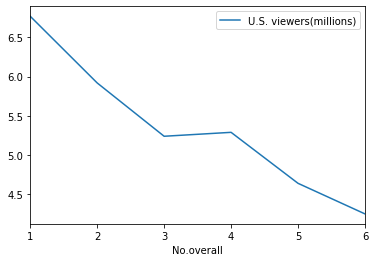

In [83]:
episode_list.iloc[:,5:7].plot(); 

But what if we want to get really fancy? PyPlot has some really excellent features. We can append this stuff to the default figure 1.

In [ ]:
#plt.plot?

In [ ]:
print(type(episode_list.iloc[:,1]))
print(type(episode_list.iloc[:,1].values))

In [ ]:
#plt.xticks?

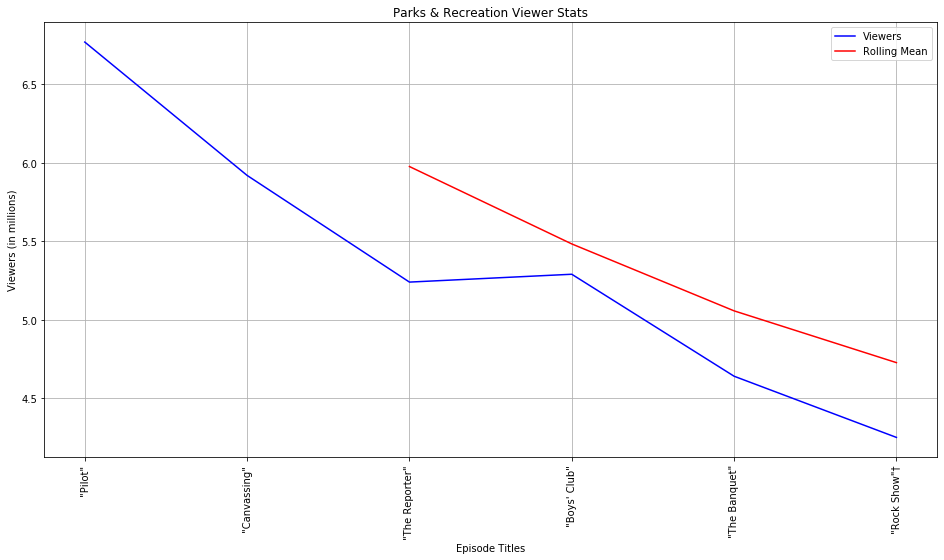

In [86]:
episode_titles = episode_list.iloc[:,1].values
episode_viewers = episode_list.iloc[:,5].values

index = np.arange(len(episode_list))

plt.figure(num=None, figsize=(16, 8), facecolor='w', edgecolor='k')
plt.xlabel('Episode Titles')
plt.title('Parks & Recreation Viewer Stats')
plt.xticks(index,episode_titles,rotation=90)
plt.ylabel('Viewers (in millions)')
plt.plot(index, episode_viewers,'b',label='Viewers')
plt.plot(pd.Series(episode_viewers).rolling(window=3).mean(),'r',label='Rolling Mean')
plt.grid()

plt.legend()
plt.show()